In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape #view dataset size

(60000, 28, 28)

In [4]:
train_images[0,23,23] #view one pixel from image 0

194

In [5]:
train_labels[0:10] #look at first 10 labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

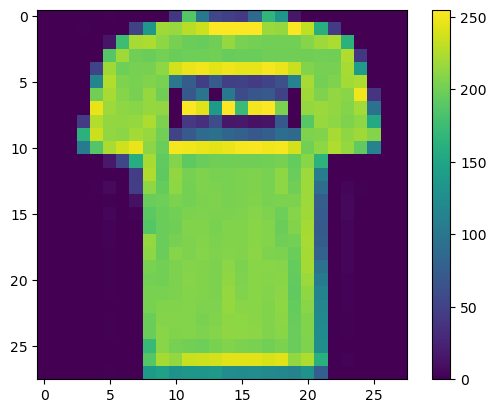

In [8]:
plt.figure() #use mat plot lib too look at images
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
#preprocessing dataset, having all pixes between value of 0 and 1
test_images = test_images / 255.0

In [10]:
#defining the architecture of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [11]:
#classify how the model "learns"
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)  #here we train the data epochs is how many times we go over the given dataset

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4971 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3765 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3393 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3145 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2945 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2683 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2575 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2476 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.239

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)  
#lower accuracy than training accuracy? that is an example of over fitting
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3416 - accuracy: 0.8805
Test accuracy: 0.8805000185966492


In [19]:
predictions = model.predict(test_images)

#np.argmax() produces the index of the largest value

313/313 [==============================] - 0s 1ms/step
9


In [20]:
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])

9
Ankle boot


Pick a number: 12
1/1 [==============================] - 0s 14ms/step


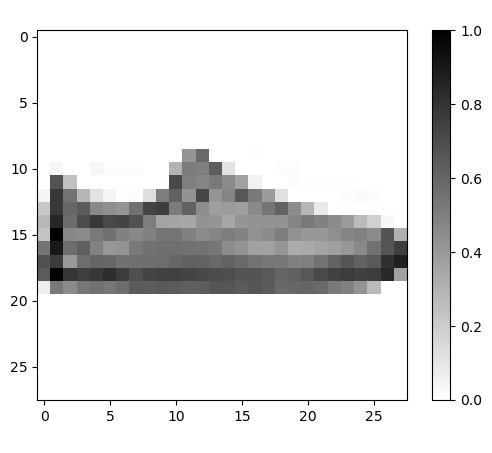

In [22]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)